In [83]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sb
drug = pd. read_excel('Medicine.xlsx')
drug. info()
drug. shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Month          159 non-null    datetime64[ns]
 1   Medicine_name  159 non-null    object        
 2   Sales_qty      159 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.9+ KB


(159, 3)

In [84]:
drug. head()

,Month,Medicine_name,Sales_qty
0,2009-01-01,Atropine Sulphate,1709
1,2009-02-01,Bupivacaine Hydrochloride,1621
2,2009-03-01,Diazepam,1973
3,2009-04-01,EMLA cream,1812
4,2009-05-01,Ether,1975


In [85]:
drug. isna(). sum()

Month            0
Medicine_name    0
Sales_qty        0
dtype: int64

In [86]:
duplicate = drug. duplicated()
sum(duplicate)

0

In [87]:
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [88]:
drug['mnth_yr'] = drug['Month'].apply(lambda x: x.strftime('%B-%Y'))  #creating new column "mnth_yr" which contain month and year
drug = drug. drop("Month", axis=1)  # column "Month" is droped from  dataframe  
drug = drug. rename({'mnth_yr': 'Month'}, axis=1) # Renamed column "mnth_yr" to "Month"

In [89]:
drug

,Medicine_name,Sales_qty,Month
0,Atropine Sulphate,1709,January-2009
1,Bupivacaine Hydrochloride,1621,February-2009
2,Diazepam,1973,March-2009
3,EMLA cream,1812,April-2009
4,Ether,1975,May-2009
...,...,...,...
154,Desipramine,900,November-2021
155,Doxepin,600,December-2021
156,Fluvoxamine,1500,January-2022
157,Imipramine Hcl,400,February-2022


In [90]:
drug = drug[['Month','Sales_qty']]
drug. head()

,Month,Sales_qty
0,January-2009,1709
1,February-2009,1621
2,March-2009,1973
3,April-2009,1812
4,May-2009,1975


In [91]:
drug

,Month,Sales_qty
0,January-2009,1709
1,February-2009,1621
2,March-2009,1973
3,April-2009,1812
4,May-2009,1975
...,...,...
154,November-2021,900
155,December-2021,600
156,January-2022,1500
157,February-2022,400


<AxesSubplot: xlabel='Month'>

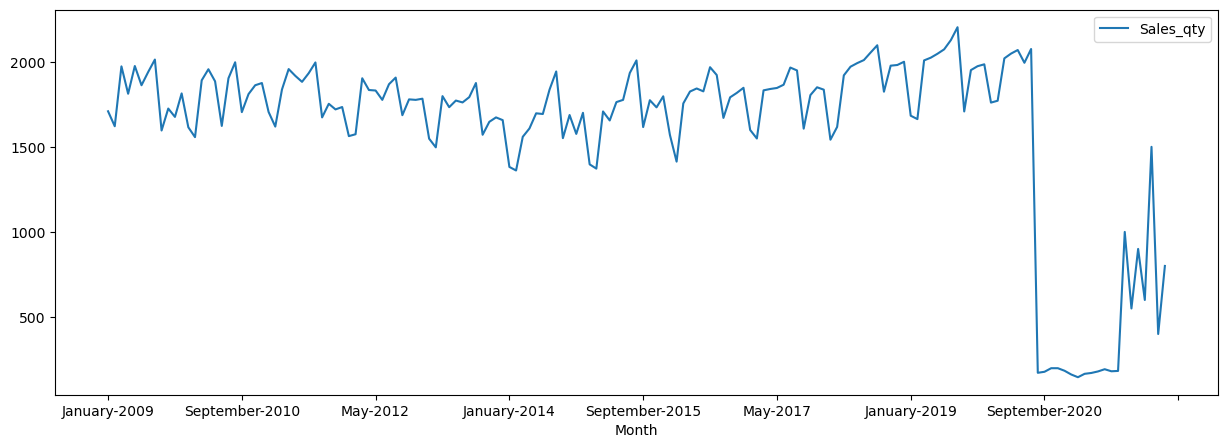

In [92]:
#visualisation of our target variable 
drug.set_index('Month', inplace=True)
drug['Sales_qty'].plot(figsize = (15,5), legend = True)

In [93]:
#plot acf and pacf plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

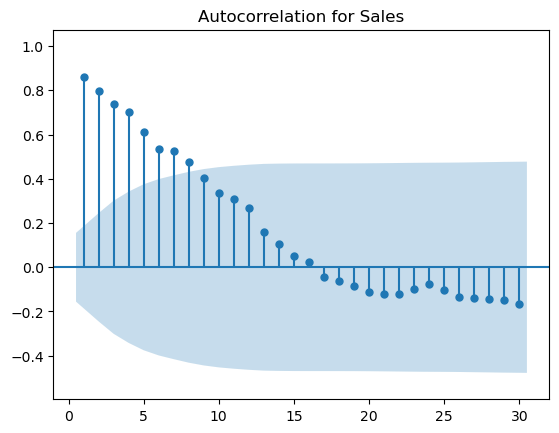

In [94]:
plot_acf(drug['Sales_qty'], lags = 30, title='Autocorrelation for Sales', zero=False, auto_ylims=True)
plt. show()
#ACF plot shows significant 10 lags 

C:\Users\debna\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


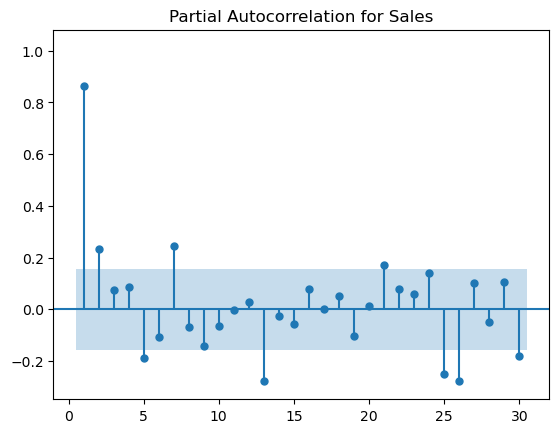

In [95]:
plot_pacf(drug['Sales_qty'], lags = 30, title='Partial Autocorrelation for Sales', zero=False, auto_ylims=True)
plt. show()

#PACF plot shows significant 1 lag

In [96]:
#to check stationarity in the data
import statsmodels.tsa.stattools as sts
sts.adfuller(drug['Sales_qty'])
#sales is stationary (p-value<0.05). but it has some seasonality

(-2.3619831190059504,
 0.15275505110802845,
 12,
 146,
 {'1%': -3.4759527332353084,
  '5%': -2.881548071241103,
  '10%': -2.577438765246763},
 1987.6216874573004)

In [97]:
# Here our target variable is Sales and we need to forecast sales hence from now we will only focus on Sales column
from statsmodels.tsa.seasonal import seasonal_decompose

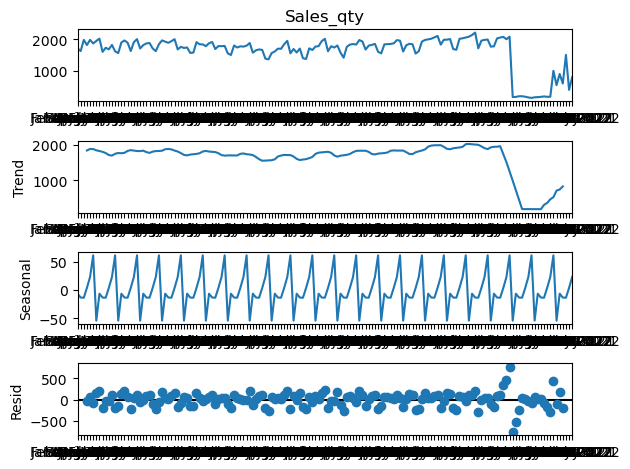

In [98]:
sd_sales = seasonal_decompose(drug['Sales_qty'], model='additive', period = 7)
sd_sales.plot()
plt. show()

<AxesSubplot: xlabel='Month'>

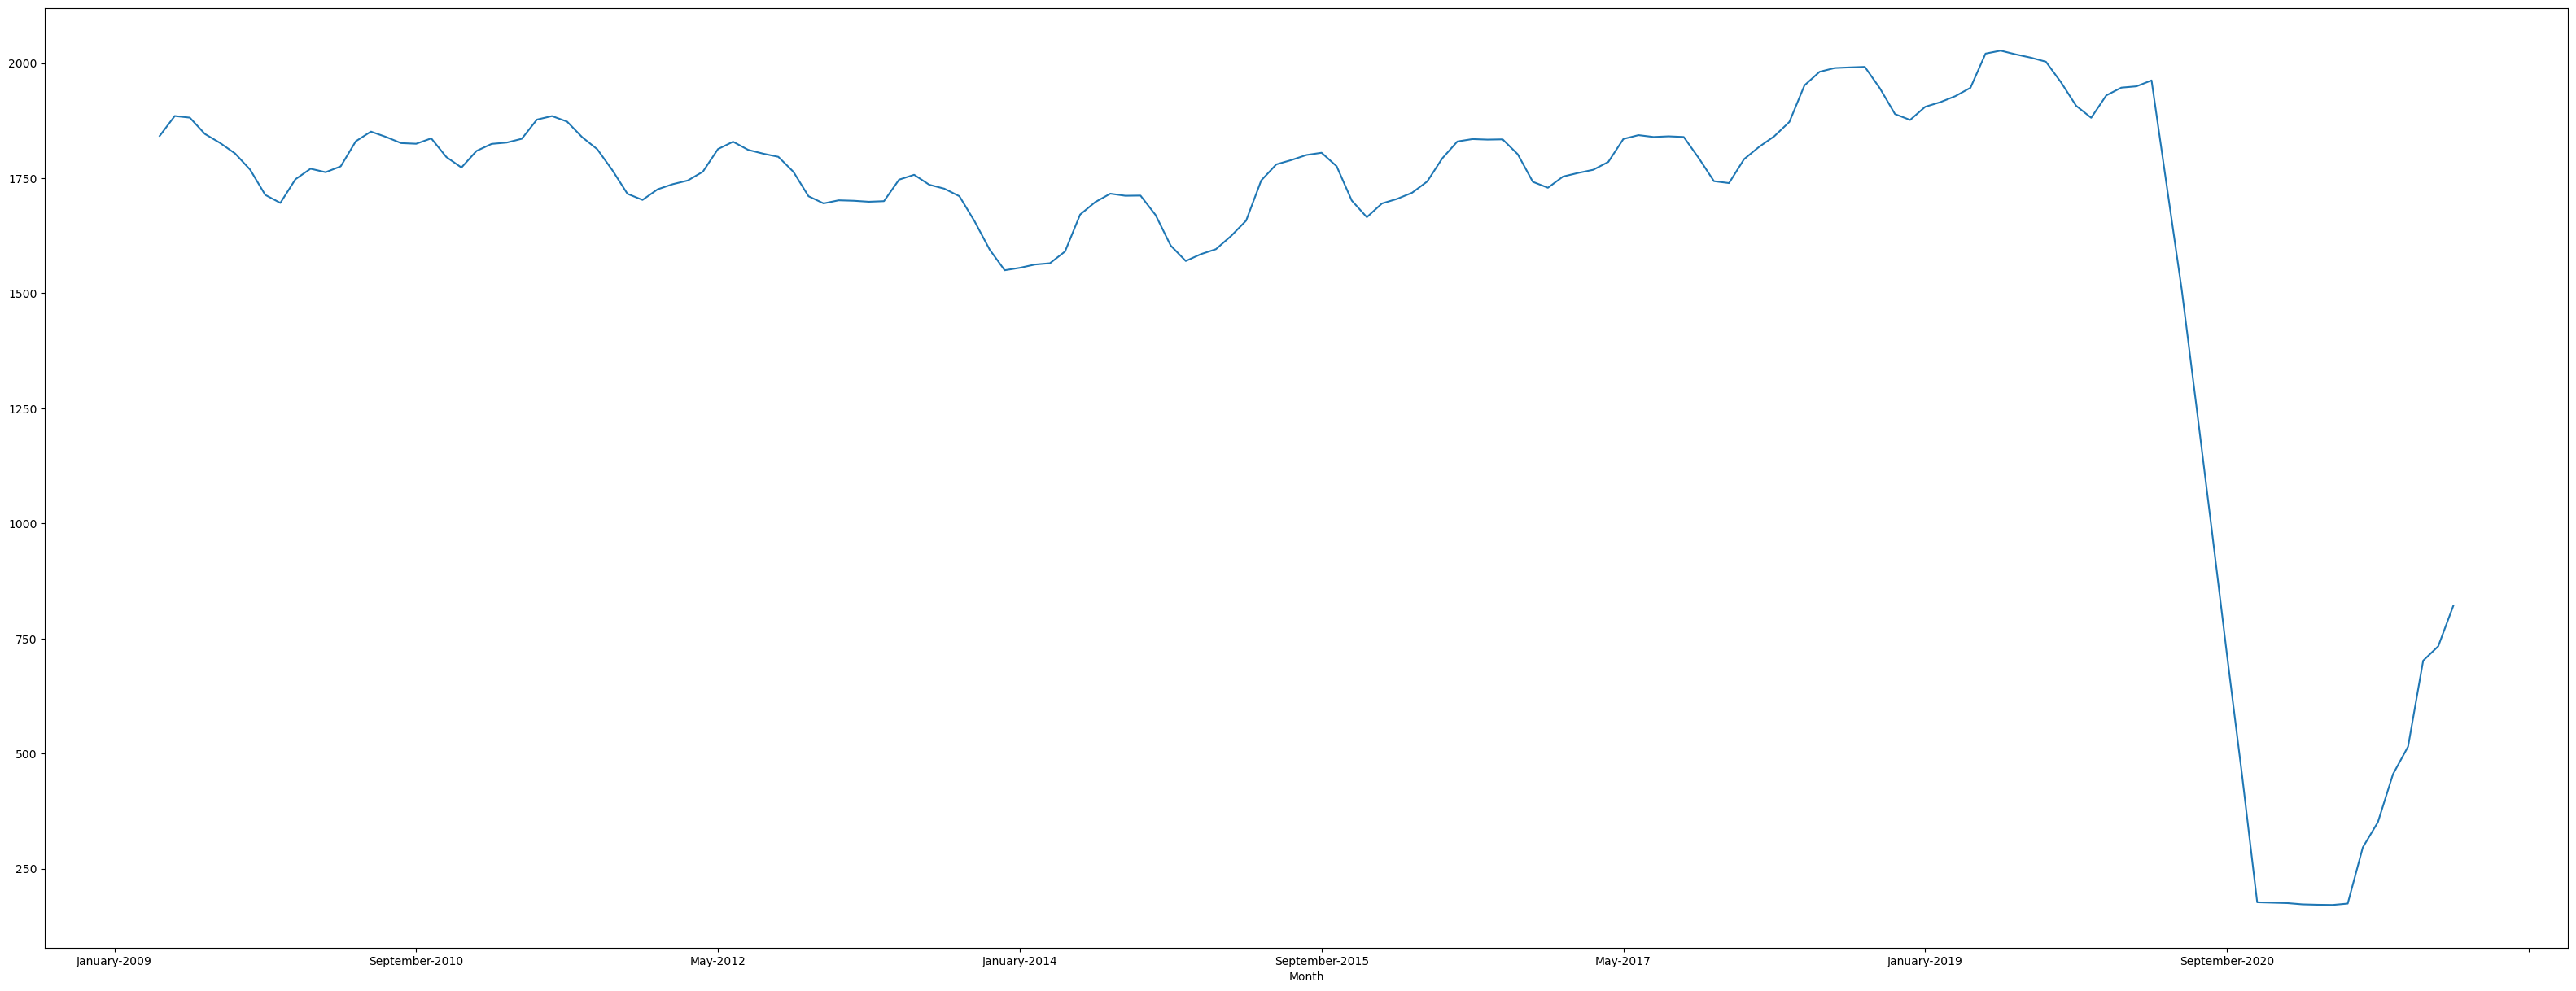

In [99]:
sd_sales.trend.plot(figsize = (40,15))

<AxesSubplot: xlabel='Month'>

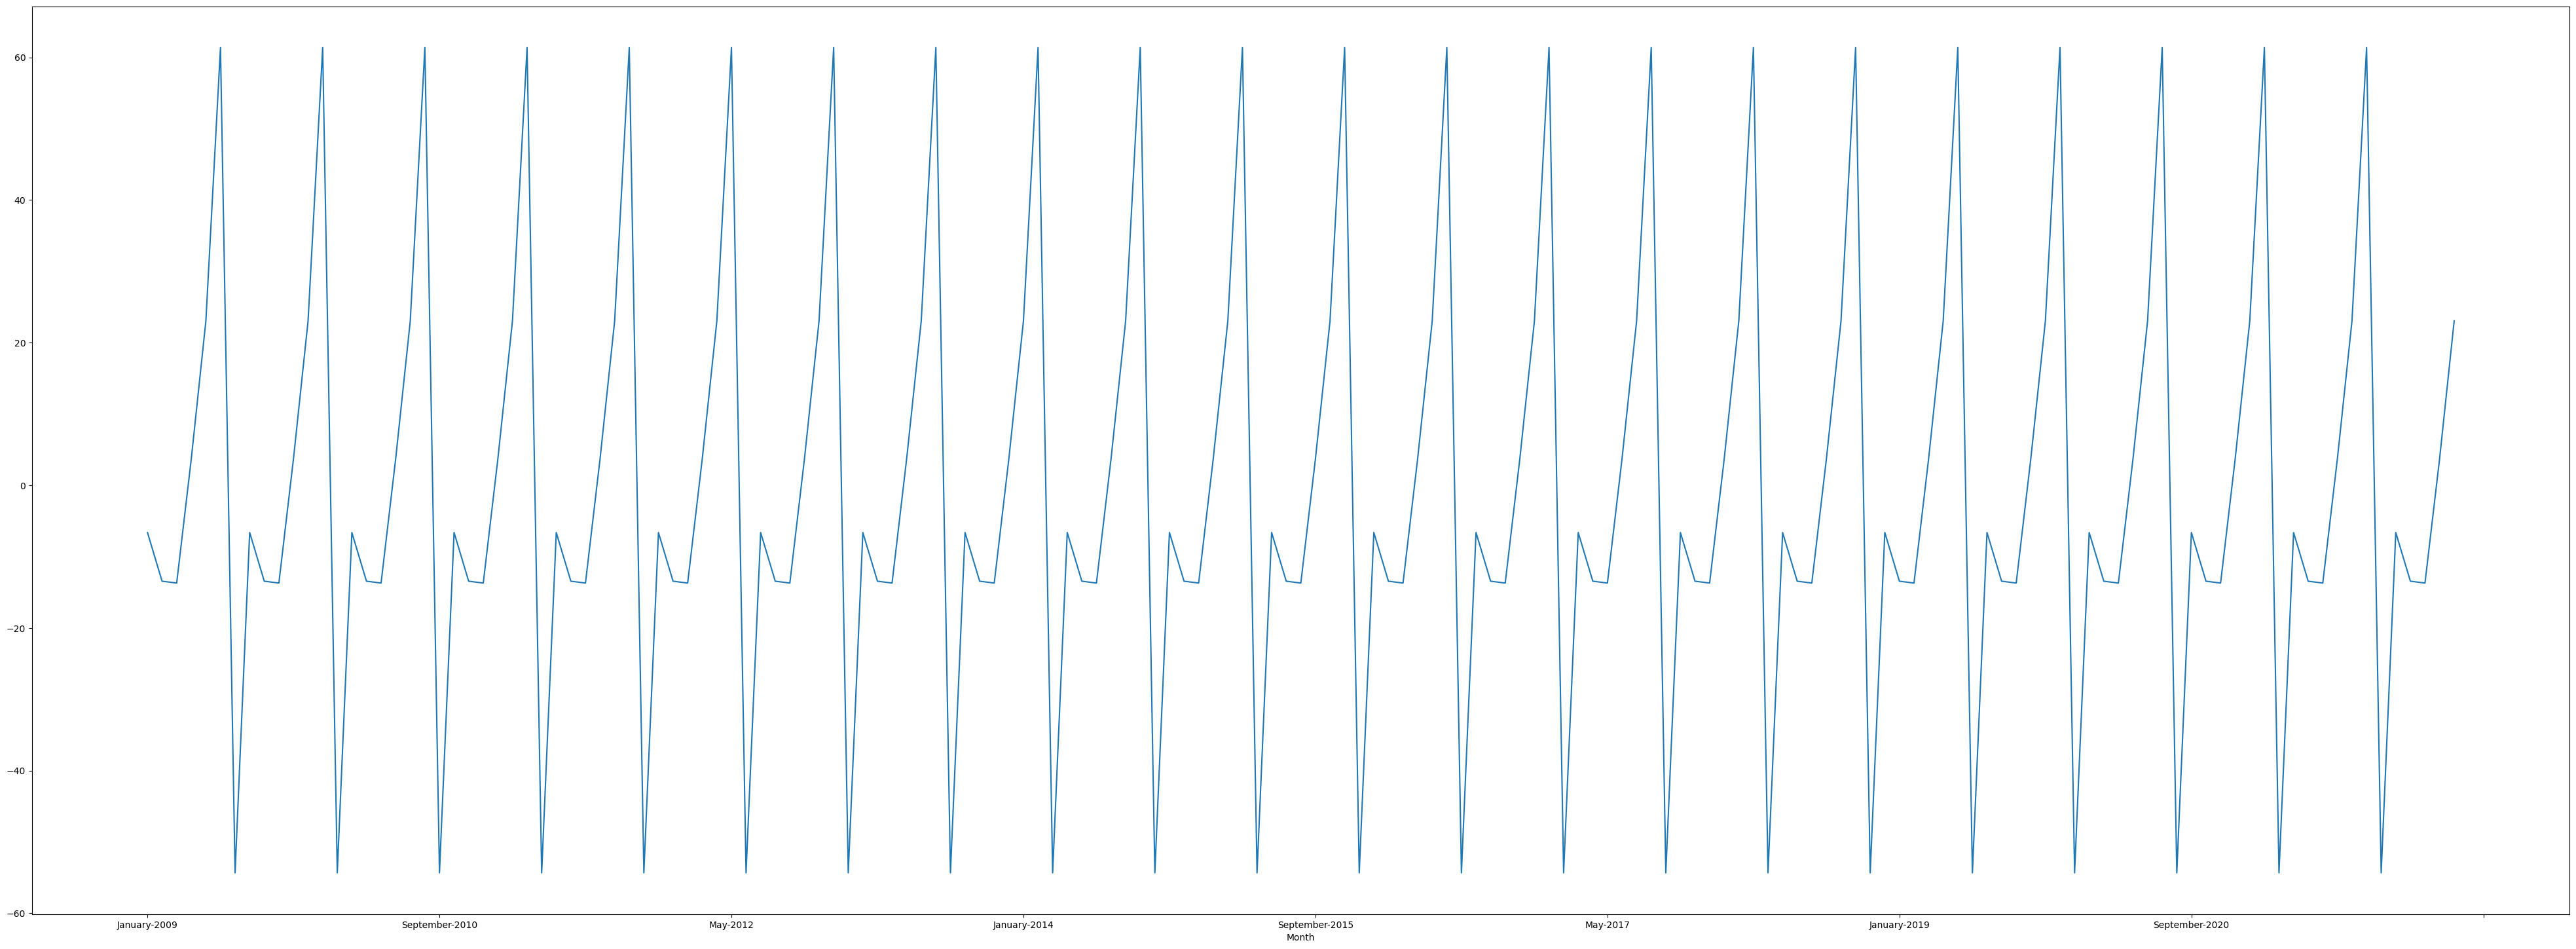

In [100]:
sd_sales.seasonal.plot(figsize = (50,18)) #there is seasonality

In [103]:
drug["t_square"] = drug["t"] * drug["t"]
drug["log_sales"] = np. log(drug["Sales_qty"])


Index(['Sales_qty', 't', 't_square', 'log_sales'], dtype='object')